# 30254 - ML for Public Policy HW2 - Nora Hajjar

## Machine Learning Pipeline Version 1: 
This document is an example of running the ML pipeline for one specific model, in this case a decision tree classifier. Demo shows how the functions in accompanying file pipeline.py work

### 1) LOAD DATA

In [189]:
#import pipeline.py file
%load_ext autoreload
%autoreload 2
import pipeline as p
import matplotlib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [190]:
#load dataframe
df = p.load_data('credit-data.csv')

In [191]:
#look at data
df.head()

PersonID  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0     98976                 0                              1.000000   55   
1     98991                 0                              0.547745   71   
2     99012                 0                              0.044280   51   
3     99023                 0                              0.914249   55   
4     99027                 0                              0.026599   45   

   zipcode  NumberOfTime30-59DaysPastDueNotWorse   DebtRatio  MonthlyIncome  \
0    60601                                     0  505.000000            0.0   
1    60601                                     0    0.459565        15666.0   
2    60601                                     0    0.014520         4200.0   
3    60601                                     4    0.794875         9052.0   
4    60601                                     0    0.049966        10406.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                                2                        0   
1                                7                        0   
2                                5                        0   
3                               12                        0   
4                                4                        0   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                             0                                     0   
1                             2                                     0   
2                             0                                     0   
3                             3                                     0   
4                             0                                     0   

   NumberOfDependents  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 2.0

### 2) EXPLORE DATA

In [192]:
p.get_sum_stats(df)

PersonID  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
count   41016.000000      41016.000000                           41016.00000   
mean   115800.154598          0.161400                               6.37587   
std     28112.723511          0.367904                             221.61895   
min        22.000000          0.000000                               0.00000   
25%    106539.750000          0.000000                               0.03431   
50%    119901.500000          0.000000                               0.18973   
75%    134698.250000          0.000000                               0.66716   
max    149999.000000          1.000000                           22000.00000   

                age       zipcode  NumberOfTime30-59DaysPastDueNotWorse  \
count  41016.000000  41016.000000                          41016.000000   
mean      51.683489  60623.824166                              0.589233   
std       14.746880     11.984357                              5.205628   
min       21.000000  60601.000000                              0.000000   
25%       41.000000  60618.000000                              0.000000   
50%       51.000000  60625.000000                              0.000000   
75%       62.000000  60629.000000                              0.000000   
max      109.000000  60644.000000                             98.000000   

           DebtRatio  MonthlyIncome  NumberOfOpenCreditLinesAndLoans  \
count   41016.000000   3.304200e+04                     41016.000000   
mean      331.458137   6.578996e+03                         8.403477   
std      1296.109695   1.344683e+04                         5.207324   
min         0.000000   0.000000e+00                         0.000000   
25%         0.176375   3.333000e+03                         5.000000   
50%         0.369736   5.250000e+03                         8.000000   
75%         0.866471   8.055750e+03                        11.000000   
max    106885.000000   1.794060e+06                        56.000000   

       NumberOfTimes90DaysLate  NumberRealEstateLoansOrLines  \
count             41016.000000                  41016.000000   
mean                  0.419592                      1.008801   
std                   5.190382                      1.153826   
min                   0.000000                      0.000000   
25%                   0.000000                      0.000000   
50%                   0.000000                      1.000000   
75%                   0.000000                      2.000000   
max                  98.000000                     32.000000   

       NumberOfTime60-89DaysPastDueNotWorse  NumberOfDependents  
count                          41016.000000        39979.000000  
mean                               0.371587            0.773231  
std                                5.169641            1.121269  
min                                0.000000            0.000000  
25%                                0.000000            0.000000  
50%                                0.000000            0.000000  
75%                                0.000000            1.000000  
max                               98.000000           13.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a4bb3d080>,
      dtype=object)

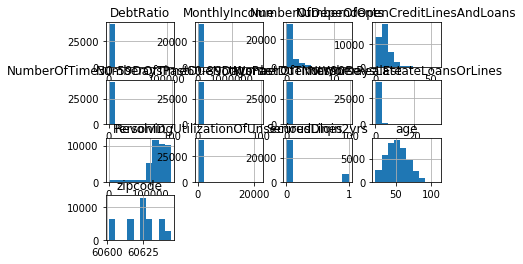

In [193]:
p.get_hist(df)

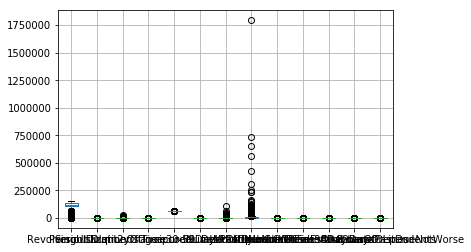

In [194]:
p.get_outliers(df)

### 3) CLEAN DATA

In [195]:
#show null counts
null_counts = p.check_null_counts(df)
null_counts

PersonID                                   0
SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
zipcode                                    0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                           7974
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      1037
dtype: int64

In [196]:
#get null columns
null_cols = p.get_null_cols(df, null_counts)

In [197]:
#fill null cols
p.fill_null_cols(df, null_cols)

In [198]:
#nulls were successfully filled with the mean of the column
p.check_null_counts(df)

PersonID                                0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
zipcode                                 0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [199]:
df.head()

PersonID  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0     98976                 0                              1.000000   55   
1     98991                 0                              0.547745   71   
2     99012                 0                              0.044280   51   
3     99023                 0                              0.914249   55   
4     99027                 0                              0.026599   45   

   zipcode  NumberOfTime30-59DaysPastDueNotWorse   DebtRatio  MonthlyIncome  \
0    60601                                     0  505.000000            0.0   
1    60601                                     0    0.459565        15666.0   
2    60601                                     0    0.014520         4200.0   
3    60601                                     4    0.794875         9052.0   
4    60601                                     0    0.049966        10406.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                                2                        0   
1                                7                        0   
2                                5                        0   
3                               12                        0   
4                                4                        0   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                             0                                     0   
1                             2                                     0   
2                             0                                     0   
3                             3                                     0   
4                             0                                     0   

   NumberOfDependents  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 2.0

### 4) GENERATE PREDICTORS

In [200]:
#apply function to at least one variable
p.convert_var_cont_to_disc(df, 'new_income', 'MonthlyIncome', 3, [1, 2, 3])
#it works! New, clean column created
df.head()

PersonID  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0     98976                 0                              1.000000   55   
1     98991                 0                              0.547745   71   
2     99012                 0                              0.044280   51   
3     99023                 0                              0.914249   55   
4     99027                 0                              0.026599   45   

   zipcode  NumberOfTime30-59DaysPastDueNotWorse   DebtRatio  MonthlyIncome  \
0    60601                                     0  505.000000            0.0   
1    60601                                     0    0.459565        15666.0   
2    60601                                     0    0.014520         4200.0   
3    60601                                     4    0.794875         9052.0   
4    60601                                     0    0.049966        10406.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                                2                        0   
1                                7                        0   
2                                5                        0   
3                               12                        0   
4                                4                        0   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                             0                                     0   
1                             2                                     0   
2                             0                                     0   
3                             3                                     0   
4                             0                                     0   

   NumberOfDependents new_income  
0                 0.0          1  
1                 0.0          1  
2                 0.0          1  
3                 0.0          1  
4                 2.0          1

In [201]:
#apply function to at least one variable
p.convert_var_cat_to_bin(df, 'new_del', 'SeriousDlqin2yrs', 0, 1)
#it works! New, clean column created
df.head()
#creation of new column worked
df.new_del.unique()

array([0, 1])

In [202]:
p.convert_var_cont_to_disc(df, 'new_age', 'age', 6)
df.head()

PersonID  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0     98976                 0                              1.000000   55   
1     98991                 0                              0.547745   71   
2     99012                 0                              0.044280   51   
3     99023                 0                              0.914249   55   
4     99027                 0                              0.026599   45   

   zipcode  NumberOfTime30-59DaysPastDueNotWorse   DebtRatio  MonthlyIncome  \
0    60601                                     0  505.000000            0.0   
1    60601                                     0    0.459565        15666.0   
2    60601                                     0    0.014520         4200.0   
3    60601                                     4    0.794875         9052.0   
4    60601                                     0    0.049966        10406.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                                2                        0   
1                                7                        0   
2                                5                        0   
3                               12                        0   
4                                4                        0   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                             0                                     0   
1                             2                                     0   
2                             0                                     0   
3                             3                                     0   
4                             0                                     0   

   NumberOfDependents new_income  new_del           new_age  
0                 0.0          1        0    (50.333, 65.0]  
1                 0.0          1        0    (65.0, 79.667]  
2                 0.0          1        0    (50.333, 65.0]  
3                 0.0          1        0    (50.333, 65.0]  
4                 2.0          1        0  (35.667, 50.333]

In [203]:
p.convert_var_cont_to_disc(df, 'new_dependents', 'NumberOfDependents', 6, [1,2,3,4,5,6])
df.head()

PersonID  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0     98976                 0                              1.000000   55   
1     98991                 0                              0.547745   71   
2     99012                 0                              0.044280   51   
3     99023                 0                              0.914249   55   
4     99027                 0                              0.026599   45   

   zipcode  NumberOfTime30-59DaysPastDueNotWorse   DebtRatio  MonthlyIncome  \
0    60601                                     0  505.000000            0.0   
1    60601                                     0    0.459565        15666.0   
2    60601                                     0    0.014520         4200.0   
3    60601                                     4    0.794875         9052.0   
4    60601                                     0    0.049966        10406.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                                2                        0   
1                                7                        0   
2                                5                        0   
3                               12                        0   
4                                4                        0   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                             0                                     0   
1                             2                                     0   
2                             0                                     0   
3                             3                                     0   
4                             0                                     0   

   NumberOfDependents new_income  new_del           new_age new_dependents  
0                 0.0          1        0    (50.333, 65.0]              1  
1                 0.0          1        0    (65.0, 79.667]              1  
2                 0.0          1        0    (50.333, 65.0]              1  
3                 0.0          1        0    (50.333, 65.0]              1  
4                 2.0          1        0  (35.667, 50.333]              1

In [204]:
p.convert_var_cont_to_disc(df, 'new_debt_ratio', 'DebtRatio', 6, [1,2,3,4,5,6])
df.head()

PersonID  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0     98976                 0                              1.000000   55   
1     98991                 0                              0.547745   71   
2     99012                 0                              0.044280   51   
3     99023                 0                              0.914249   55   
4     99027                 0                              0.026599   45   

   zipcode  NumberOfTime30-59DaysPastDueNotWorse   DebtRatio  MonthlyIncome  \
0    60601                                     0  505.000000            0.0   
1    60601                                     0    0.459565        15666.0   
2    60601                                     0    0.014520         4200.0   
3    60601                                     4    0.794875         9052.0   
4    60601                                     0    0.049966        10406.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                                2                        0   
1                                7                        0   
2                                5                        0   
3                               12                        0   
4                                4                        0   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                             0                                     0   
1                             2                                     0   
2                             0                                     0   
3                             3                                     0   
4                             0                                     0   

   NumberOfDependents new_income  new_del           new_age new_dependents  \
0                 0.0          1        0    (50.333, 65.0]              1   
1                 0.0          1        0    (65.0, 79.667]              1   
2                 0.0          1        0    (50.333, 65.0]              1   
3                 0.0          1        0    (50.333, 65.0]              1   
4                 2.0          1        0  (35.667, 50.333]              1   

  new_debt_ratio  
0              1  
1              1  
2              1  
3              1  
4              1

In [205]:
#now split data into train/test
X_train, X_test, y_train, y_test = p.split_data(df, ['age', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans'], 'SeriousDlqin2yrs')


### 5) BUILD MACHINE LEARNING CLASSIFIER

#### MODEL 1: Run Decision Tree Classifier w/ Gini

In [206]:
y_test, y_pred, tree = p.build_tree_classifier(X_train, X_test, y_train, y_test,'gini')

### 6) EVALUATE CLASSIFIER

In [207]:
p.calc_accuracy(y_test, y_pred)

74.13692217671152

In [208]:
p.calc_confusion_matrix(y_test, y_pred,columns=['Predicted Not Distress', 'Predicted Distress'], index=['True Not Distress', 'True Distress'])

True Not Distress  True Distress
Predicted Not Distress               7211           1430
Predicted Distress                   1222            391

In [209]:
p.calc_feature_importance(['age', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans'], tree)

feature  importance
0                              age    0.198116
1                        DebtRatio    0.403518
2                    MonthlyIncome    0.258301
3  NumberOfOpenCreditLinesAndLoans    0.140065

In [210]:
p.calc_cross_val_score(tree, X, y)

array([0.78344182, 0.7747952 , 0.7815083 ])

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.183529 to fit



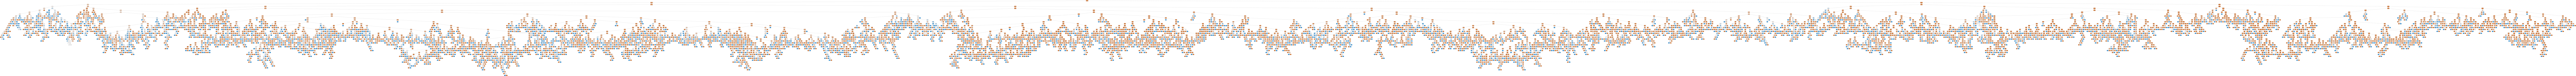

In [211]:
p.visualize_tree(tree)

#### MODEL 2: Run Decision Tree Classifier w/ Entropy


In [212]:
y_test_entr, y_pred_entr, tree_entr = p.build_tree_classifier(X_train, X_test, y_train, y_test,'entropy')

In [213]:
p.calc_accuracy(y_test_entr, y_pred_entr)

74.42949093036863

In [214]:
p.calc_confusion_matrix(y_test_entr, y_pred_entr,columns=['Predicted Not Distress', 'Predicted Distress'], index=['True Not Distress', 'True Distress'])

True Not Distress  True Distress
Predicted Not Distress               7249           1392
Predicted Distress                   1230            383

In [215]:
p.calc_feature_importance(['age', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans'], tree_entr)

feature  importance
0                              age    0.202540
1                        DebtRatio    0.405227
2                    MonthlyIncome    0.258701
3  NumberOfOpenCreditLinesAndLoans    0.133532

In [216]:
p.calc_cross_val_score(tree_entr, X, y)

array([0.7843926 , 0.77501463, 0.77946017])

In [ ]:
p.visualize_tree(tree_entr)